In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

In [3]:
transform = transforms.ToTensor()

train_data = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
train_loader = DataLoader(train_data, batch_size=64, shuffle=True)

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 9912422/9912422 [00:02<00:00, 4398508.67it/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 28881/28881 [00:00<00:00, 284135.98it/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 1648877/1648877 [00:00<00:00, 2350337.43it/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 4542/4542 [00:00<00:00, 5779893.44it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



In [4]:
class Autoencoder(nn.Module):
    def __init__(self):
        super(Autoencoder, self).__init__()

        # Encoder
        self.encoder = nn.Sequential(
            nn.Flatten(),
            nn.Linear(28*28, 128),
            nn.ReLU(),
            nn.Linear(128, 64)
        )

        # Decoder
        self.decoder = nn.Sequential(
            nn.Linear(64, 128),
            nn.ReLU(),
            nn.Linear(128, 28*28),
            nn.Sigmoid(),  # For normalized output [0,1]
            nn.Unflatten(1, (1, 28, 28))
        )

    def forward(self, x):
        z = self.encoder(x)
        out = self.decoder(z)
        return out


In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')


model = Autoencoder().to(device)

criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=1e-3)

num_epochs = 5

for epoch in range(num_epochs):
    for images, _ in train_loader:
        images = images.to(device)

        outputs = model(images) # Forward pass on training data
        loss = criterion(outputs, images) # Compute loss on training predictions

        optimizer.zero_grad()  # Clear previous gradients
    
        loss.backward()  # Backpropagation to compute gradients
        optimizer.step()  # Update weights using optimizer

    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}")


Epoch [1/5], Loss: 0.0186
Epoch [2/5], Loss: 0.0112
Epoch [3/5], Loss: 0.0088
Epoch [4/5], Loss: 0.0076
Epoch [5/5], Loss: 0.0067


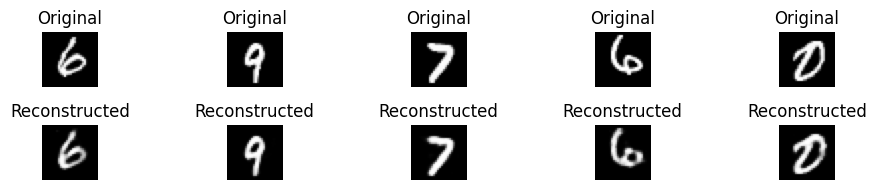

In [ ]:
# Test reconstruction
test_images, _ = next(iter(train_loader))
test_images = test_images.to(device)
with torch.no_grad():
    reconstructed = model(test_images)

# Show original vs reconstructed
def imshow(img, title=''):
    img = img.cpu().numpy().squeeze()
    plt.imshow(img, cmap='gray')
    plt.title(title)
    plt.axis('off')

plt.figure(figsize=(10, 2))
for i in range(5):
    plt.subplot(2, 5, i+1)
    imshow(test_images[i], title="Original")
    plt.subplot(2, 5, i+6)
    imshow(reconstructed[i], title="Reconstructed")
plt.tight_layout()
plt.show()
